In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Lecture du dataset
df= pd.read_csv('../data/external/train.csv')

In [51]:
df.shape

(1245954, 18)

In [36]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [39]:
#Valeurs nulles
df.isna().sum()

Date received                         0
Product                               0
Sub-product                           0
Issue                                 0
Sub-issue                             0
Consumer complaint narrative          0
Company public response               0
Company                               0
State                                 0
ZIP code                              0
Tags                                  0
Consumer consent provided?            0
Submitted via                         0
Date sent to company                  0
Company response to consumer          0
Timely response?                      0
Consumer disputed?              1197844
Complaint ID                          0
dtype: int64

In [6]:
#Compter le nombre de modalités de la variable 'Product'
df.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    778990
Debt collection                                                                 210805
Credit reporting or other personal consumer reports                              72657
Mortgage                                                                         59437
Checking or savings account                                                      46699
Credit card or prepaid card                                                      35040
Credit reporting                                                                 21216
Student loan                                                                     21110
Name: Product, dtype: int64

In [7]:
# Balance the data
df_grouped_by = df.groupby(['Product'])
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced = df_balanced.droplevel(['Product'])
df_balanced.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/02/18,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I opened a Capital One 360 checking account a ...,None,CAPITAL ONE FINANCIAL CORPORATION,NY,XXXXX,None,Consent provided,Web,07/02/18,Closed with explanation,Yes,NaN,2951366
1,05/30/20,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,"On XX/XX/2020 at around XXXX AM, I received a ...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,GA,30058,Older American,Consent provided,Web,05/30/20,Closed with explanation,Yes,NaN,3675602
2,03/13/23,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,"On XXXX XXXX, {$700.00} was fraudulently taken...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,PA,17055,None,Consent provided,Web,03/13/23,Closed with explanation,Yes,NaN,6687520


In [44]:
df_balanced.to_csv('complaints.csv', index=False,encoding='utf-8')

In [8]:
df_balanced.shape

(168880, 18)

In [9]:
df_balanced.Product.value_counts()

Checking or savings account                                                     21110
Credit card or prepaid card                                                     21110
Credit reporting                                                                21110
Credit reporting or other personal consumer reports                             21110
Credit reporting, credit repair services, or other personal consumer reports    21110
Debt collection                                                                 21110
Mortgage                                                                        21110
Student loan                                                                    21110
Name: Product, dtype: int64

In [10]:
df_balanced.Issue.value_counts()

Incorrect information on your report                                                21665
Incorrect information on credit report                                              21110
Managing an account                                                                 20971
Dealing with your lender or servicer                                                19118
Problem with a purchase shown on your statement                                     15787
Trouble during payment process                                                      13392
Improper use of your report                                                         12411
Problem with a credit reporting company's investigation into an existing problem    10878
Attempts to collect debt not owed                                                    9090
Struggling to pay mortgage                                                           6867
Problem with a company's investigation into an existing problem                      5571
Written no

In [11]:
#Remove stop words
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk

In [12]:
stopword=set(stopwords.words('english'))

In [13]:
import string
import re
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text

In [14]:
df_balanced['clean_text'] = df_balanced["Consumer complaint narrative"].apply(clean)

In [15]:
df_balanced["Consumer complaint narrative"].iloc[1]

'On XX/XX/2020 at around XXXX AM, I received a called from my sister, XXXX XXXX, stated that Wells Fargo Bank was trying to get in touch with me and said I needed to call back. The woman leaving the message said her name was XXXX. I did not call back right away, but about 10 minutes after getting the message my phone began to ring. and continued to do ring twice before my daughter XXXX said, that might be Wells Fargo calling back. I then answered the phone and it was the woman named XXXX and that she was from Wells Fargo. She proceeded to tell me that there are some unauthorized transactions on my debit card. She went on to say that someone in another state was using my card number at a Target for {$690.00} and a XXXX for {$120.00}. She stated that Wells Fargo is shutting my card down and issuing out a new one. XXXX had my personal information like the last four of my Social Security and my cellphone number. She went on to say I will be receiving a verification code through a text mess

In [16]:
df_balanced["clean_text"].iloc[1]

' around xxxx received called sister xxxx xxxx stated wells fargo bank trying get touch said needed call back woman leaving message said name xxxx call back right away  minutes getting message phone began ring continued ring twice daughter xxxx said might wells fargo calling back answered phone woman named xxxx wells fargo proceeded tell unauthorized transactions debit card went say someone another state using card number target  xxxx  stated wells fargo shutting card issuing new one xxxx personal information like last four social security cellphone number went say receiving verification code text message give number receive told hold hang came back said set receive new debit card xxxx business days hung checked account found  wire transfer account immediately called bank told happened account compromised person spoke bank named xxxx connected fraud department taken xxxx xxxx wells fargo given claims number xxxx'

In [17]:
data=df_balanced[["Product", "clean_text", "Issue"]].copy()

In [18]:
data.columns=["category", "complaint", "Issue"]

In [19]:
data.head(1)

,category,complaint,Issue
0,Checking or savings account,opened capital one checking account month ago...,Managing an account


In [20]:
# Encoder la variable cible "category"
data["category_id"]= data["category"].factorize()[0]

In [21]:
category_id_df = data[['category', 'category_id']].drop_duplicates()

In [22]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [42]:
category_to_id

{'Checking or savings account': 0,
 'Credit card or prepaid card': 1,
 'Credit reporting': 2,
 'Credit reporting or other personal consumer reports': 3,
 'Credit reporting, credit repair services, or other personal consumer reports': 4,
 'Debt collection': 5,
 'Mortgage': 6,
 'Student loan': 7}

### Text Processing

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [103]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [24]:
count_vec = CountVectorizer(max_df=0.90,min_df=2,
                           max_features=1000,stop_words='english')

bagofword_vec = count_vec.fit_transform(data['complaint'])
bagofword_vec
labels =data.category_id

In [ ]:
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
 #                       ngram_range=(1, 2), 
  #                      stop_words='english')

# We transform each complaint into a vector
#features = tfidf.fit_transform(data.complaint).toarray()

#labels = data.category_id

#print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

In [25]:
X= data.loc[:, 'complaint']
y= data.loc[:, 'category_id']

In [26]:
X_train, X_test, y_train, y_test,indices_train, indices_test = train_test_split(X,y,data.index,
                                                    test_size=0.2)
#X_train.shape,X_test.shape

In [27]:
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(xtrain_cv,y_train)

#Predict the response for test dataset
y_pred = clf.predict(xtrain_cv)
clf.score(xtest_cv,y_test)

0.6994315490288963

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
%%time
sgdc = SGDClassifier()
sgdc.fit(xtrain_cv, y_train)
#sgdc.fit(xtrain_cv, y_train)
sgdc.score(xtest_cv, y_test)

CPU times: user 10.2 s, sys: 52.6 ms, total: 10.2 s
Wall time: 10.3 s


0.7110966366650876

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
%%time
classifier = LogisticRegression()
classifier.fit(xtrain_cv, y_train)
score = classifier.score(xtest_cv, y_test)

print("Accuracy:", score)

Accuracy: 0.7523685457129322
CPU times: user 28.6 s, sys: 901 ms, total: 29.5 s
Wall time: 7.71 s


In [42]:
%%time
mb = MultinomialNB()
mb.fit(xtrain_cv, y_train.ravel())
#mb.fit(xtrain_cv,y_train)
mbpred = mb.predict(xtest_cv)
print(metrics.accuracy_score(y_test,mbpred))

0.7132579346281384
CPU times: user 76.9 ms, sys: 5.32 ms, total: 82.2 ms
Wall time: 81.2 ms


In [43]:
%%time
rf = RandomForestClassifier()
rf.fit(xtrain_cv,y_train)
print(metrics.accuracy_score(y_test,rf.predict(xtest_cv)))

0.8056016106110848
CPU times: user 9min 27s, sys: 1.46 s, total: 9min 28s
Wall time: 9min 31s


In [124]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import xgboost as xgb

In [33]:
%%time
# Train the XGBoost model
model = xgb.XGBClassifier(learning_rate =0.3,
 n_estimators=1000,
 max_depth=5,
 n_jobs=-1)
model.fit(xtrain_cv, y_train)
predictions = model.predict(xtest_cv)
# Evaluate the model performance
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 82.21%
CPU times: user 5min 22s, sys: 48.8 s, total: 6min 11s
Wall time: 49.8 s


In [281]:
def plot_classification_report(y_true, y_pred, label_list, title= "Classification report"):
    report = classification_report(y_true, y_pred, labels=label_list, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True)
    plt.title(title)

    plt.tight_layout()

    return fig

In [298]:
category_to_id

{'Checking or savings account': 0,
 'Credit card or prepaid card': 1,
 'Credit reporting': 2,
 'Credit reporting or other personal consumer reports': 3,
 'Credit reporting, credit repair services, or other personal consumer reports': 4,
 'Debt collection': 5,
 'Mortgage': 6,
 'Student loan': 7}

Mapping from Integers to Categories:  {0: 'Checking or savings account', 1: 'Credit card or prepaid card', 2: 'Credit reporting', 3: 'Credit reporting or other personal consumer reports', 4: 'Credit reporting, credit repair services, or other personal consumer reports', 5: 'Debt collection', 6: 'Mortgage', 7: 'Student loan'}


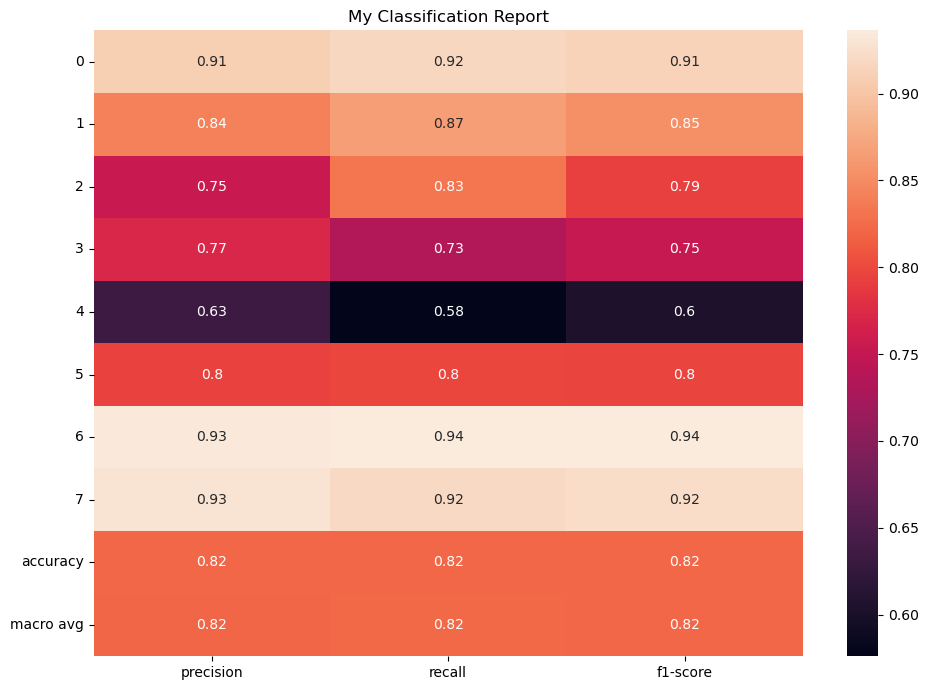

In [302]:
y_true = y_test
y_pred = predictions
label_list = [0,1,2,3,4,5,6,7]

#fig1 = plot_confusion_matrix(y_true, y_pred, label_list, title="My Confusion Matrix")
fig2 = plot_classification_report(y_true, y_pred, label_list, title="My Classification Report")
#fig1.savefig('confusion_matrix.png')
fig2.savefig('classification_report.png')
print("Mapping from Integers to Categories: ", id_to_category)

In [276]:
# Classification Report
from sklearn.metrics import classification_report
sampleClassificationReport= classification_report(y_test, predictions)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4217
           1       0.84      0.87      0.85      4166
           2       0.75      0.83      0.79      4234
           3       0.77      0.73      0.75      4307
           4       0.63      0.58      0.60      4217
           5       0.80      0.80      0.80      4225
           6       0.93      0.94      0.94      4196
           7       0.93      0.92      0.92      4214

    accuracy                           0.82     33776
   macro avg       0.82      0.82      0.82     33776
weighted avg       0.82      0.82      0.82     33776



In [277]:
plot_classification_report(sampleClassificationReport)
plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.close()

[0.91, 0.92, 0.91]
[0.84, 0.87, 0.85]
[0.75, 0.83, 0.79]
[0.77, 0.73, 0.75]
[0.63, 0.58, 0.6]
[0.8, 0.8, 0.8]
[0.93, 0.94, 0.94]
[0.93, 0.92, 0.92]
[0.82]


ValueError: could not convert string to float: 'avg'

In [39]:
from nltk.stem import PorterStemmer

In [58]:
def stemmer(text):
    stems=[]
    ps= PorterStemmer()
    for w in text.split():
        root_word= ps.stem(w)
        stems.append(root_word)
    return ' '.join(stems)

In [49]:
example= data["complaint"].iloc[0]

In [68]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/omarsaaoui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
lemma=WordNetLemmatizer()

def lemmatizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [72]:
from pywsd.utils import lemmatize_sentence

Warming up PyWSD (takes ~10 secs)... took 1.9375109672546387 secs.


### Issues

In [30]:
data.iloc

,category,complaint,Issue,category_id
0,Checking or savings account,opened capital one checking account month ago...,Managing an account,0
1,Checking or savings account,around xxxx received called sister xxxx xxxx ...,Managing an account,0
2,Checking or savings account,xxxx xxxx fraudulently taken wells fargo savi...,Managing an account,0


In [31]:
df_balanced.Issue.value_counts()

Incorrect information on your report                                                21665
Incorrect information on credit report                                              21110
Managing an account                                                                 20971
Dealing with your lender or servicer                                                19118
Problem with a purchase shown on your statement                                     15787
Trouble during payment process                                                      13392
Improper use of your report                                                         12411
Problem with a credit reporting company's investigation into an existing problem    10878
Attempts to collect debt not owed                                                    9090
Struggling to pay mortgage                                                           6867
Problem with a company's investigation into an existing problem                      5571
Written no

In [48]:
data2= pd.DataFrame(data, columns=['complaint', 'Issue'])

In [49]:
data2.head(2)

,complaint,Issue
0,wells fargo bank account timeframe listed sett...,Managing an account
1,opened pnc account part account opening inclu...,Managing an account


In [50]:
# Encoder la variable cible "category"
data2["issue_id"]= data2["Issue"].factorize()[0]

In [51]:
category_id_df_issue = data2[['Issue', 'issue_id']].drop_duplicates()

In [52]:
category_to_id_issue = dict(category_id_df_issue.values)
id_to_category_issue = dict(category_id_df_issue[['issue_id', 'Issue']].values)

In [53]:
X_issue= data2.loc[:, 'complaint']
y_issue= data2.loc[:, 'issue_id']

In [54]:
X_train_issue, X_test_issue, y_train_issue, y_test_issue = train_test_split(X_issue,y_issue,
                                                    test_size=0.2)
X_train_issue.shape,X_test_issue.shape

((135104,), (33776,))

In [55]:
xtrain_cv_issue = count_vec.fit_transform(X_train_issue)
xtest_cv_issue = count_vec.transform(X_test_issue)
xtrain_cv_issue.shape

(135104, 1000)

In [124]:
# Create Decision Tree classifer object
clf_issue = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_issue = clf_issue.fit(xtrain_cv_issue,y_train_issue)

#Predict the response for test dataset
#y_pred = clf_issue.predict(X_train_issue)
clf_issue.score(xtest_cv_issue,y_test_issue)

0.6287896731406916

In [127]:
%%time
from sklearn.linear_model import SGDClassifier

sgdc_issue = SGDClassifier()
sgdc_issue.fit(xtrain_cv_issue, y_train_issue)
sgdc_issue.score(xtest_cv_issue, y_test_issue)

CPU times: user 15.5 s, sys: 72.8 ms, total: 15.6 s
Wall time: 15.7 s


0.6392408810990052

In [128]:
%%time
classifier_issue = LogisticRegression()
classifier_issue.fit(xtrain_cv_issue, y_train_issue)
score_issue = classifier_issue.score(xtest_cv_issue, y_test_issue)

print("Accuracy:", score_issue)

Accuracy: 0.6808680720037896
CPU times: user 34.9 s, sys: 38.3 s, total: 1min 13s
Wall time: 10.3 s


In [129]:
%%time
mb_issue = MultinomialNB()
mb_issue.fit(xtrain_cv_issue,y_train_issue)
mbpred_issue = mb_issue.predict(xtest_cv_issue)
print(metrics.accuracy_score(y_test_issue,mbpred_issue))

0.6457839886309806
CPU times: user 81.4 ms, sys: 41.1 ms, total: 122 ms
Wall time: 126 ms


In [130]:
%%time
rf_issue = RandomForestClassifier()
rf_issue.fit(xtrain_cv_issue,y_train_issue)
print(metrics.accuracy_score(y_test_issue,rf_issue.predict(xtest_cv_issue)))

0.7398744670772146
CPU times: user 9min 52s, sys: 2.1 s, total: 9min 54s
Wall time: 9min 57s


In [56]:
%%time
# Train the XGBoost model
model_issue = xgb.XGBClassifier(n_jobs=-1)
model_issue.fit(xtrain_cv_issue, y_train_issue)
predictions_issue = model_issue.predict(xtest_cv_issue)
# Evaluate the model performance
accuracy_issue = metrics.accuracy_score(y_test_issue, predictions_issue)
print("Accuracy: {:.2f}%".format(accuracy_issue * 100))

Accuracy: 73.55%
CPU times: user 1min 39s, sys: 14.8 s, total: 1min 54s
Wall time: 15.9 s


In [85]:
example= data2['complaint'].iloc[50000]

In [86]:
example

'divorce decree indicate ex wife pay medical expenses created children collection placed report resulting failure pay medical bills daughter disputed issue experian sent report stating collection remain work payment arrangement creditor'

In [87]:
example= count_vec.transform([example])

In [88]:
model_issue.predict(example)

array([6])

In [67]:
category_to_id_issue
#id_to_category_issue

{'Managing an account': 0,
 'Incorrect information on your report': 1,
 'Improper use of your report': 2,
 "Problem with a credit reporting company's investigation into an existing problem": 3,
 "Problem with a company's investigation into an existing problem": 4,
 'Problem with a purchase shown on your statement': 5,
 'Incorrect information on credit report': 6,
 'Written notification about debt': 7,
 'Attempts to collect debt not owed': 8,
 "Cont'd attempts collect debt not owed": 9,
 'False statements or representation': 10,
 'Took or threatened to take negative or legal action': 11,
 'Communication tactics': 12,
 'Trouble during payment process': 13,
 'Struggling to pay mortgage': 14,
 'Dealing with your lender or servicer': 15}

In [84]:
data2.iloc[50000]

complaint    divorce decree indicate ex wife pay medical ex...
Issue                   Incorrect information on credit report
issue_id                                                     6
Name: 7780, dtype: object

### Evidently AI

In [132]:
pip install evidently

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 2.6 MB/s eta 0:00:00
  Using cached pygments-2.17.2-py3-none-any.whl (1.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: watchdog
    Found existing installation: watchdog 2.1.6
    Uninstalling watchdog-2.1.6:
 

In [1]:
import evidently
evidently.__version__

'0.4.12'

In [6]:
!jupyter nbextension install --sys-prefix --symlink --overwrite --py evidently

Installing /Users/omarsaaoui/opt/anaconda3/lib/python3.9/site-packages/evidently/nbextension/static -> evidently
Removing: /Users/omarsaaoui/opt/anaconda3/share/jupyter/nbextensions/evidently
Symlinking: /Users/omarsaaoui/opt/anaconda3/share/jupyter/nbextensions/evidently -> /Users/omarsaaoui/opt/anaconda3/lib/python3.9/site-packages/evidently/nbextension/static
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable evidently --py --sys-prefix
    


In [136]:
pip install jupyter_contrib_nbextensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 1.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 2.7 MB/s eta 0:00:0000:0100:01
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428784 sha256=db16dd9784de5a3d197df3e0941fc384112d4b2e7dae5a582e543f779b187d00
  Stored in directory: /Users/omarsaaoui/Library/Caches/pip/wheels/e7/99/91/7f24a075786a6760f3ac32ab5fa92e1d1a90e0d2cd8958adfd
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=d147b1f4c21d353ce88d291b19e8ec44551d29ba6d835b0b9e5c2a3e99a13d4a
  Stored in directory: /Users/omarsaaoui/Library/Caches/pip/wheels/57/9f/80/32c07b8a950a45f6cf8cd5980c22a27ce514c27b795250e497
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core
Note: you may need to restart t

In [8]:
!jupyter nbextension enable evidently --py --sys-prefix

Enabling notebook extension evidently/extension...
      - Validating: OK


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [53]:
data.head()

,category,complaint,Issue,category_id
0,Checking or savings account,opened capital one checking account month ago...,Managing an account,0
1,Checking or savings account,around xxxx received called sister xxxx xxxx ...,Managing an account,0
2,Checking or savings account,xxxx xxxx fraudulently taken wells fargo savi...,Managing an account,0
3,Checking or savings account,savings account hsbc bank dormancy activity p...,Managing an account,0
4,Checking or savings account,xxxxxxxx younger brother xxxx xxxx steal life ...,Managing an account,0


In [272]:
from evidently.pipeline.column_mapping import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset
from evidently.metric_preset import ClassificationPreset
from evidently.metrics import ClassificationQualityMetric, TextDescriptorsDriftMetric,ClassificationQualityByClass, ColumnDriftMetric,ClassificationConfusionMatrix

In [153]:
init_data = data[['complaint', 'category']]

In [252]:
target_classes= ['Checking or savings account', 'Credit card or prepaid card',
       'Credit reporting',
       'Credit reporting or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Student loan']

In [147]:
iris

['Checking or savings account',
 'Credit card or prepaid card',
 'Credit reporting',
 'Credit reporting or other personal consumer reports',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Mortgage',
 'Student loan']

In [149]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [154]:
X_trainEv, X_testEv, y_trainEv, y_testEv = train_test_split(init_data['complaint'], init_data['category'],
                                                    test_size=0.4, random_state=42, shuffle=True)

reference = pd.DataFrame({'complaint': X_trainEv, 'category': y_trainEv})
valid = pd.DataFrame({'complaint': X_testEv, 'category': y_testEv})

In [232]:
pipeline = Pipeline(
    [
        ("vectorization", TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words="english")),
        #("classification", SGDClassifier(alpha=0.0001, max_iter=50, penalty='l1', loss='modified_huber', random_state=42))
        ("Classification", ensemble.RandomForestClassifier(random_state=1, n_estimators=3))
    ])
pipeline.fit(reference['complaint'].values, reference['category'].values)

Pipeline(steps=[('vectorization',
                 TfidfVectorizer(max_df=0.5, stop_words='english',
                                 sublinear_tf=True)),
                ('Classification',
                 RandomForestClassifier(n_estimators=3, random_state=1))])

In [235]:
#reference['predict_proba'] = pipeline.predict_proba(reference['complaint'].values)[:,1]
#valid['predict_proba'] = pipeline.predict_proba(valid['complaint'].values)[:,1]
#Reference and current data for Multiclass classification, option 1
reference['pred'] = pipeline.predict(reference['complaint'])
valid['pred'] = pipeline.predict(valid['complaint'])

In [238]:
init_data.category

0        Checking or savings account
1        Checking or savings account
2        Checking or savings account
3        Checking or savings account
4        Checking or savings account
                    ...             
21105                   Student loan
21106                   Student loan
21107                   Student loan
21108                   Student loan
21109                   Student loan
Name: category, Length: 168880, dtype: object

In [239]:
ref2= reference.copy()
val2= valid.copy()

In [261]:
ref2

,complaint,category,predict_proba,pred
19085,went xxxx saw seller selling shoes contacted m...,Checking or savings account,0.666667,Category
3724,dear credit reporting agency recently discover...,Credit reporting or other personal consumer re...,0.000000,Category
17426,xxxxxxxx requested loans placed forbearance ...,Student loan,0.000000,Category
8783,credit inquires credit xxxx xxxx xxxx xxxx xxx...,"Credit reporting, credit repair services, or o...",0.000000,Category
14552,almost dollars taken past year banks chase...,Checking or savings account,0.000000,Category
...,...,...,...,...
14329,letter serves second warning take legal action...,Debt collection,0.000000,Category
19254,writing good letter see get late payment remov...,"Credit reporting, credit repair services, or o...",0.000000,Category
5272,mortgage accounts get paid via bill pay xxxx ...,Mortgage,0.000000,Category
20207,hardship started monthly payment increased r...,Mortgage,0.000000,Category


In [262]:
ref2['pred']= ref2['category']

In [265]:
ref2['target']= ref2['category']

In [267]:
val2['pred']= val2['category']
val2['target']= val2['category']

In [268]:
column_mapping = ColumnMapping()

column_mapping.target = 'target'
column_mapping.prediction = 'pred'
column_mapping.target_names = ['Checking or savings account',
 'Credit card or prepaid card',
 'Credit reporting',
 'Credit reporting or other personal consumer reports',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Mortgage',
 'Student loan']
column_mapping.task = 'classification'

In [273]:
classification_report = Report(metrics=[
    ClassificationConfusionMatrix(),
    ClassificationQualityByClass(),
])

classification_report.run(reference_data=ref2, current_data=val2,column_mapping=column_mapping)
classification_report

KeyError: 'Checking or savings account'

In [116]:
from sklearn import datasets, ensemble, model_selection

In [117]:
#Dataset for Multiclass Classification
iris_data = datasets.load_iris(as_frame='auto')
iris = iris_data.frame

iris_ref = iris.sample(n=150, replace=False)
iris_cur = iris.sample(n=150, replace=False)

model = ensemble.RandomForestClassifier(random_state=1, n_estimators=3)
model.fit(iris_ref[iris_data.feature_names], iris_ref.target)

#Reference and current data for Multiclass classification, option 1
iris_ref['pred'] = model.predict(iris_ref[iris_data.feature_names])
iris_cur['pred'] = model.predict(iris_cur[iris_data.feature_names])

#Reference and current data for Multiclass classification, option 2
target_classes = ['Setosa', 'Versicolor', 'Virginica']

iris_ref2 = iris_ref.copy()
iris_cur2 = iris_cur.copy()

iris_ref2['pred'] = iris_ref.pred.apply(lambda x: iris_data.target_names[x].capitalize())
iris_ref2['target'] = iris_ref.target.apply(lambda x: iris_data.target_names[x].capitalize())
iris_cur2['pred'] = iris_cur.pred.apply(lambda x: iris_data.target_names[x].capitalize())
iris_cur2['target'] = iris_cur.target.apply(lambda x: iris_data.target_names[x].capitalize())

In [229]:
iris_ref2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
70,5.9,3.2,4.8,1.8,Versicolor,Versicolor
56,6.3,3.3,4.7,1.6,Versicolor,Versicolor
19,5.1,3.8,1.5,0.3,Setosa,Setosa
66,5.6,3.0,4.5,1.5,Versicolor,Versicolor
72,6.3,2.5,4.9,1.5,Versicolor,Versicolor
...,...,...,...,...,...,...
21,5.1,3.7,1.5,0.4,Setosa,Setosa
130,7.4,2.8,6.1,1.9,Virginica,Virginica
50,7.0,3.2,4.7,1.4,Versicolor,Versicolor
32,5.2,4.1,1.5,0.1,Setosa,Setosa


In [204]:
reviews.columns

Index(['Unnamed:_0', 'Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name', 'prediction'],
      dtype='object')

In [206]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [207]:
iris_ref2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
70,5.9,3.2,4.8,1.8,Versicolor,Versicolor
56,6.3,3.3,4.7,1.6,Versicolor,Versicolor
19,5.1,3.8,1.5,0.3,Setosa,Setosa
66,5.6,3.0,4.5,1.5,Versicolor,Versicolor
72,6.3,2.5,4.9,1.5,Versicolor,Versicolor
...,...,...,...,...,...,...
21,5.1,3.7,1.5,0.4,Setosa,Setosa
130,7.4,2.8,6.1,1.9,Virginica,Virginica
50,7.0,3.2,4.7,1.4,Versicolor,Versicolor
32,5.2,4.1,1.5,0.1,Setosa,Setosa


In [230]:
#Multiclass Probabilistic Classification
iris_ref_prob = model.predict_proba(iris_ref[iris_data.feature_names])
iris_cur_prob = model.predict_proba(iris_cur[iris_data.feature_names])

target_classes = ['Setosa', 'Versicolor', 'Virginica']

iris_ref_prob_df = pd.DataFrame(iris_ref_prob, columns=target_classes)
iris_cur_prob_df = pd.DataFrame(iris_cur_prob, columns=target_classes)

iris_ref_prob_df['pred'] = model.predict(iris_ref[iris_data.feature_names])
iris_ref_prob_df['target'] = iris_ref.target.apply(lambda x: iris_data.target_names[x].capitalize())
#iris_cur_prob_df['pred'] = model.predict(iris_cur[iris_data.feature_names])
#iris_cur_prob_df['target'] = iris_cur.target.apply(lambda x: iris_data.target_names[x].capitalize())

In [231]:
iris_ref_prob_df

,Setosa,Versicolor,Virginica,pred,target
0,0.0,1.000000,0.000000,1,Setosa
1,0.0,1.000000,0.000000,1,Setosa
2,1.0,0.000000,0.000000,0,Setosa
3,0.0,1.000000,0.000000,1,Setosa
4,0.0,0.666667,0.333333,1,Setosa
...,...,...,...,...,...
145,1.0,0.000000,0.000000,0,Virginica
146,0.0,0.000000,1.000000,2,Virginica
147,0.0,1.000000,0.000000,1,Virginica
148,1.0,0.000000,0.000000,0,Virginica


In [215]:
iris_ref_prob_df

,Setosa,Versicolor,Virginica
0,0.0,1.000000,0.000000
1,0.0,1.000000,0.000000
2,1.0,0.000000,0.000000
3,0.0,1.000000,0.000000
4,0.0,0.666667,0.333333
...,...,...,...
145,1.0,0.000000,0.000000
146,0.0,0.000000,1.000000
147,0.0,1.000000,0.000000
148,1.0,0.000000,0.000000


In [216]:
reference['predict_proba']

19085    0.538912
3724     0.000000
17426    0.000000
8783     0.007815
14552    0.164942
           ...   
14329    0.000000
19254    0.000000
5272     0.000000
20207    0.000000
16408    0.000000
Name: predict_proba, Length: 101328, dtype: float64

In [264]:
ref2

,complaint,category,predict_proba,pred
19085,went xxxx saw seller selling shoes contacted m...,Checking or savings account,0.666667,Checking or savings account
3724,dear credit reporting agency recently discover...,Credit reporting or other personal consumer re...,0.000000,Credit reporting or other personal consumer re...
17426,xxxxxxxx requested loans placed forbearance ...,Student loan,0.000000,Student loan
8783,credit inquires credit xxxx xxxx xxxx xxxx xxx...,"Credit reporting, credit repair services, or o...",0.000000,"Credit reporting, credit repair services, or o..."
14552,almost dollars taken past year banks chase...,Checking or savings account,0.000000,Checking or savings account
...,...,...,...,...
14329,letter serves second warning take legal action...,Debt collection,0.000000,Debt collection
19254,writing good letter see get late payment remov...,"Credit reporting, credit repair services, or o...",0.000000,"Credit reporting, credit repair services, or o..."
5272,mortgage accounts get paid via bill pay xxxx ...,Mortgage,0.000000,Mortgage
20207,hardship started monthly payment increased r...,Mortgage,0.000000,Mortgage


In [ ]:
# chaine de déploiement: actions github, render
# chaine de développement: mlflow , dvc, dagshub
